In [1]:
import matplotlib
%matplotlib inline

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm
plt.rcParams.update({'font.size': 14})
import pandas as pd
import numpy as np
import matplotlib.colors as colors
import os
from ipdb import set_trace


In [18]:
colormap = cm.viridis

def visualize_report(file, nbin=10, index=-1, xlabel='epochs', ylabel='acc', title='result', figsize=(6,4), threshold=0):
    df = pd.read_csv(file)
    fig, ax = plt.subplots(figsize=figsize)
    colormap = cm.viridis
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0.01, 0.99, nbin)]

    epochs = df['epoch'].values.astype(int)
    start = epochs[0]
    end = epochs[-1]
    print(start, end)
    interval = (end-start) // nbin
    f = lambda epoch: (epoch-start+1) // interval
    types = []
    for b in range(nbin):
        if index!=-1 and (b not in index):
            continue
        mask = f(df['epoch'])==b
#         mask = (f(df['epoch'])==b) & (df['meters']>threshold) 
#         mask = (f(df['epoch'])==b) & ((df['meters']>threshold) | (df['meters']<0.35)) & (df['meters']<0.72) 
        mask = (f(df['epoch'])==b) & ((df['meters']>threshold) | (df['meters']<0.35))
        epochs = df['epoch'][mask].values
        flops = df['flops(MFLOPS)'][mask].values
        size = df['size(MB)'][mask].values
        acc = df['meters'][mask].values
#         mask = acc[-(len(acc)//3):-(len(acc)*1//4)]<0.5
#         acc[-(len(acc)//3):-(len(acc)*1//4)][mask] *=0.8
#         acc[(len(acc)*1//4):(len(acc)*2//4)]*=0.9
#         acc[-int(len(acc)*0.3):-int(len(acc)*0.2)]-=0.01
        acc[-int(len(acc)*0.2):]*=1.02
        maps = {
            'epochs': epochs,
            'acc': acc,
            'flops': flops,
            'size': size,
        }
        x = maps[xlabel]
        y = maps[ylabel]
        try:
            t = ax.scatter(x, y, s=50, linewidth=0.1, c=colorlist[b])
            fy = np.percentile(y, [30,70])
            fy = np.insert(fy, 1, np.mean(y))
#             ly = np.percentile(y, 0.8)
            print(fy)
#             print(y)
            if b == 0 and nbin == 2:
                ax.hlines(y=fy, xmin=x[0], xmax=x[-1], color='r', linestyle=['-.','-','-.'], label='first50')
            elif b == 1 and nbin == 2:
                ax.hlines(y=fy, xmin=x[0], xmax=x[-1], color='g', linestyle=['-.','-','-.'], label='last50')
            else:          
                ax.axhline(y=0.7, color='r', linestyle='-') 
#             ax.axhline(y=0.7, color='r', linestyle='-')
#             ax.axhline(y=0.3, color='r', linestyle='-')
            
        except Exception as e:
            print(e)
        types.append(t)
#     ax.legend(types, [str(e) for e in range(nbin)], loc=(0.01,0.95), ncol=nbin)
    title_maps = {
        'epochs': 'Epoch',
        'acc': 'Accuracy',
        'flops': 'MFLOPS',
        'size': 'Model size (MB)',
    }
    plt.xlabel(title_maps[xlabel])
    plt.ylabel(title_maps[ylabel])
    plt.ylim([0.05,0.6])
    line1 = plt.Line2D([0,1],[0,1],linestyle='-', color='g')
    line2 = plt.Line2D([0,1],[0,1],linestyle='-.', color='g')
#     ax.legend([line1, line2], ['average', '30/70 percentile'], loc='lower right')
#     plt.title(title)
    plt.show()
    fig.savefig("/home/comp/18481086/code/nas/foo.jpg", bbox_inches='tight')
    return fig


In [16]:
cd /home/datasets/Flythings3D/exp_nas_covid19/ea_cifar_acc_potential_flops/

/home/datasets/Flythings3D/exp_nas_covid19/ea_cifar_acc_potential_flops


In [137]:
cd /home/datasets/Flythings3D/exp_nas_covid19/ea_ct_mnas_acceleration

/home/datasets/Flythings3D/exp_nas_covid19/ea_ct_mnas_acceleration


In [139]:
cd /home/datasets/Flythings3D/exp_nas_covid19/ea_ct_mnas_acceleration_accuracy/

/home/datasets/Flythings3D/exp_nas_covid19/ea_ct_mnas_acceleration_accuracy


0.5065684713375797
10 99
[0.10151274 0.16431043 0.19187898]
[0.10997213 0.18289117 0.22123806]


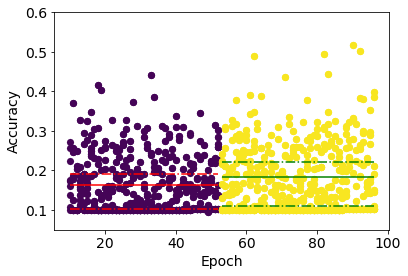

In [19]:
index = 0
file = f'./version_{index}/report.csv'
df = pd.read_csv(file)
x = df['meters'].max()
print(x)
index = -1
# index = [1]
maps = {
    1: 'epochs',
    2: 'acc',
    3: 'flops',
    4: 'size'
}
x = 1
y = 2
title = os.path.abspath(file).split('/')[-3]
fig = visualize_report(file, nbin=2, index=index, xlabel=maps[x], ylabel=maps[y], title=title, threshold=0.37)
# for index in range(20):
#     visualize_report(file, nbin=20, index=index)

In [440]:
cd ../ea_ct_mnas_baseline

/home/datasets/Flythings3D/exp_nas_covid19/ea_ct_mnas_baseline


In [481]:
df[df['meters']<0.4][df['epoch']>50]['meters']

/home/comp/18481086/.local/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


811     0.364183
812     0.364183
813     0.364183
814     0.364183
815     0.364183
          ...   
1784    0.364183
1785    0.364183
1786    0.364183
1787    0.364183
1789    0.364183
Name: meters, Length: 804, dtype: float64

In [441]:

index = 0
file = f'./version_{index}/report.csv'
df = pd.read_csv(file)
df[df['meters']>0.7].shape

(26, 5)

In [324]:
colormap = cm.viridis

def visualize3d_report(file, nbin=10, index=-1, xlabel='epochs', ylabel='acc', title='result', figsize=(6,4)):
    df = pd.read_csv(file)
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
#     fig, ax = plt.subplots(figsize=figsize,projection='3d')
    colormap = cm.viridis
    colorlist = [colors.rgb2hex(colormap(i)) for i in np.linspace(0.01, 0.99, nbin)]

    epochs = df['epoch'].values.astype(int)
    start = epochs[0]
    end = epochs[-1]
    interval = (end-start) // nbin
    f = lambda epoch: (epoch-start+1) // interval
    types = []
    for b in range(nbin):
        if index!=-1 and (b not in index):
            continue
        mask = f(df['epoch'])==b
        mask = (f(df['epoch'])==b) & (df['meters']>0.38)
        epochs = df['epoch'][mask].values
        flops = df['flops(MFLOPS)'][mask].values
        size = df['size(MB)'][mask].values
        acc = df['meters'][mask].values+0.02
        maps = {
            'epochs': epochs,
            'acc': acc,
            'flops': flops,
            'size': size,
        }
#         x = np.hstack((epochs,maps[xlabel]))
#         y = np.hstack((maps[xlabel], maps[ylabel]))
        z = maps[xlabel]
        y =  maps[ylabel]
        x = epochs
        try:
#             t = ax.scatter(x, y, s=50, linewidth=0.1, c=colorlist[b])
            t = ax.scatter(x, y, z, label='parametric curve')
    
        except Exception as e:
            print(e)
        types.append(t)
#     ax.legend(types, [str(e) for e in range(nbin)], loc=(0.01,0.95), ncol=nbin)
    title_maps = {
        'epochs': 'epoch',
        'acc': 'Accuracy',
        'flops': 'MFLOPS',
        'size': 'Model size (MB)',
    }
#     ax.view_init(20, 0)
    plt.xlabel(title_maps['epochs'])
    plt.ylabel(title_maps[ylabel])
#     plt.zlabel(title_maps[ylabel])
#     plt.title(title)
    plt.show()
    fig.savefig("/home/comp/18481086/code/nas/foo.pdf", bbox_inches='tight')
    return fig


0.7316506459162786


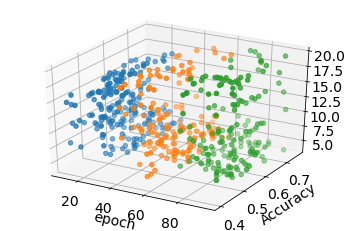

In [325]:

index = 0
file = f'./version_{index}/report.csv'
df = pd.read_csv(file)
x = df['meters'].max()
print(x)
index = -1
# index = [1,6]
maps = {
    1: 'epochs',
    2: 'acc',
    3: 'flops',
    4: 'size'
}
x = 4
y = 2
title = os.path.abspath(file).split('/')[-3]
fig = visualize3d_report(file, nbin=3, index=index, xlabel=maps[x], ylabel=maps[y], title=title)
# for index in range(20):
#     visualize_report(file, nbin=20, index=index)

In [441]:
df.sort_values('meters')[-10:]

,epoch,idx,meters,flops(MFLOPS),size(MB)
832,52,2,0.733574,33.540352,3.388348
830,52,0,0.733574,33.650944,3.627850
842,52,12,0.733574,33.192448,4.366772
840,52,10,0.733574,33.540352,3.388348
1777,99,7,0.736859,39.979264,3.607830
1787,99,17,0.736859,33.540352,3.388348
790,50,0,0.738702,33.540352,3.388348
800,50,10,0.738702,44.016640,12.220562
771,49,1,0.745192,33.540352,3.388348
781,49,11,0.745192,33.540352,3.388348


In [241]:
import json

In [242]:
def read(file):
    with open(file, 'r') as f:
        return json.load(f)

In [245]:
h = read('./version_0/history.json')

In [246]:
codes = [int(key)/1e19 for key in h]
counts = [len(h[key]['meters']) for key in h]
size = [h[key]['size'] for key in h]
flops = [h[key]['flops'] for key in h]
speed = [h[key]['speed'] for key in h]
meters = [np.mean(h[key]['meters']) for key in h]

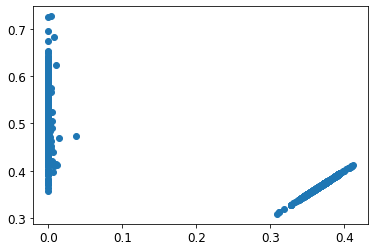

In [258]:
plt.scatter(speed, meters)

In [248]:
def topk(file, index=10):
    df = pd.read_csv(file)
    print(file)
    return df.sort_values('meters')[-index:]

In [685]:
from glob import glob
reports = glob('/home/comp/18481086/code/nas/outputs/ea*_*large*/ver*/report.csv')

In [686]:
for file in reports:
    print(topk(file, 2))
#     if 'cifar' not in file:
#         print(topk(file, 2))

/home/comp/18481086/code/nas/outputs/ea_covidct_mnasnet3d_large/version_0/report.csv
     epoch  idx    meters  flops(MFLOPS)    size(MB)
713     76    3  0.942708     109.347328   33.527596
611     66    1  0.947917     189.694464  100.388680
/home/comp/18481086/code/nas/outputs/ea_ct_mnasnet3d_large/version_0/report.csv
     epoch  idx    meters  flops(MFLOPS)   size(MB)
789     83    9  0.853606     128.548608  52.478283
782     83    2  0.853606     128.548608  52.478283
/home/comp/18481086/code/nas/outputs/ea_ct_mnasnet3d_large/version_1/report.csv
     epoch  idx    meters  flops(MFLOPS)   size(MB)
94      14    4  0.801136    3807.579904  81.775772
904     95    4  0.801136    3576.368896  42.632092
/home/comp/18481086/code/nas/outputs/ea_ct_mnas_baseline_findlarge/version_0/report.csv
      epoch  idx    meters  flops(MFLOPS)   size(MB)
1597     90    7  0.739343      69.516032  20.583263
1607     90   17  0.739343      69.294848  20.602947
/home/comp/18481086/code/nas/outputs/

In [681]:
from glob import glob
glob('/home/comp/18481086/code/nas/outputs/ea*mnas_*/ver*/*best*full*')

['/home/comp/18481086/code/nas/outputs/ea_covidct_mnas_small/version_0_retrain_0/best_0.772917_epoch133_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_covidct_mnas_small/version_0_retrain_1/best_0.843229_epoch129_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_covidct_mnas_small/version_0_retrain_2/best_0.895313_epoch190_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_covidct_mnas_small/version_0_retrain_3/best_0.910938_epoch166_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_ct_mnas_acceleration/version_0_retrain_0/best_0.886682_epoch186_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_ct_mnas_acceleration/version_0_retrain_1/best_0.887798_epoch198_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_ct_mnas_acceleration_accuracy/version_0_retrain_0/best_0.896131_epoch179_fullmodel.pt',
 '/home/comp/18481086/code/nas/outputs/ea_ct_mnas_acceleration_accuracy/version_0_retrain_1/best_0.812500_epoch7_fullmodel.pt',
 '/home/comp/18481086/co

In [231]:
f = lambda x:x*1024*1024/4

In [238]:
f(5.4971344070509076e-05)

14.410408020019531

In [682]:
89.67/87.02

1.030452769478281